In [1]:
#Previsão para os dados noshow e cancelamento

#Bibliotecas para manipulação dos dados e de tempo
import pandas as pd
import numpy as np
import datetime as dt

import numpy as np
from pandas import read_excel
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import statsmodels.api as sm
import re

import time
from dateutil import relativedelta as r

#from matplotlib.finance import candlestick_ohlc
from matplotlib import style
import matplotlib.dates as mdates
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
ncan = pd.read_csv('C:/Users/edens/Downloads/noshowcanc.csv', sep=';', 
                         encoding='utf-8', low_memory = False)

In [3]:
ncan.tail()

,Data Retirada,Canais RAC,NSH+CAN
2559,17/01/2020,Youtube / orgânico,50
2560,23/01/2020,Youtube / orgânico,100
2561,29/01/2020,Youtube / orgânico,100
2562,07/02/2020,Youtube / orgânico,50
2563,24/03/2020,Youtube / orgânico,100


In [4]:
ncan.dtypes

Data Retirada    object
Canais RAC       object
NSH+CAN           int64
dtype: object

In [5]:
ncan.shape

(2564, 3)

In [6]:
#Renomeando as colunas
ncan.rename(columns={'Data Retirada': 'DataRetirada', 
                     'Canais RAC': 'CanaisRAC',
                      'NSH+CAN': 'NSH_CAN'}, inplace=True)

In [7]:
ncan['DataRetirada']=pd.to_datetime(ncan['DataRetirada'], format = "%d/%m/%Y")
#ncan['NSH_CAN'] = ncan['NSH_CAN'].map(lambda x: x.lstrip('').rstrip('%'))
#ncan['NSH_CAN'] = ncan['NSH_CAN'].astype(int)
ncan.head()

,DataRetirada,CanaisRAC,NSH_CAN
0,2019-12-01,Acesso Direto,42
1,2019-12-02,Acesso Direto,43
2,2019-12-03,Acesso Direto,39
3,2019-12-04,Acesso Direto,43
4,2019-12-05,Acesso Direto,43


In [8]:
ncan.dtypes

DataRetirada    datetime64[ns]
CanaisRAC               object
NSH_CAN                  int64
dtype: object

In [9]:
ncan_group = ncan.groupby('CanaisRAC')['NSH_CAN'].count().reset_index()
#ncan_group

In [10]:
#google / cpc
#facebook / cpc
#afilio / cpc
#SocialMiner / cpc
#CRM / cpc
#Criteo / cpc
#RTB House / cpc
#bing / cpc
#Quinstreet / cpc
#Google / orgânico

In [10]:
ncan.head()

,DataRetirada,CanaisRAC,NSH_CAN
0,2019-12-01,Acesso Direto,42
1,2019-12-02,Acesso Direto,43
2,2019-12-03,Acesso Direto,39
3,2019-12-04,Acesso Direto,43
4,2019-12-05,Acesso Direto,43


In [11]:
#Aplicando os filtros nos datasets
#tseriesFinal3['log_canc'] = np.log(tseriesFinal3['CANCELADOS'])
google_cpc = ncan[(ncan['CanaisRAC'] =='google / cpc')]
facebook_cpc = ncan[(ncan['CanaisRAC'] =='facebook / cpc')]
afilio_cpc = ncan[(ncan['CanaisRAC'] =='afilio / cpc')]
socialMiner_cpc = ncan[(ncan['CanaisRAC'] == 'SocialMiner / cpc')]
crm_cpc = ncan[(ncan['CanaisRAC'] == 'CRM / cpc')]
criteo_cpc = ncan[(ncan['CanaisRAC'] == 'Criteo / cpc')]
rtb_house_cpc = ncan[(ncan['CanaisRAC'] == 'RTB House / cpc')]
bing_cpc = ncan[(ncan['CanaisRAC'] == 'bing / cpc')]
quinstreet_cpc = ncan[(ncan['CanaisRAC'] == 'Quinstreet / cpc')]
google_organico = ncan[(ncan['CanaisRAC'] == 'Google / orgânico')]
bing_cpc.tail()

,DataRetirada,CanaisRAC,NSH_CAN
334,2020-03-20,bing / cpc,77
335,2020-03-21,bing / cpc,60
336,2020-03-22,bing / cpc,50
337,2020-03-23,bing / cpc,50
338,2020-03-24,bing / cpc,50


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


<Figure size 1800x720 with 0 Axes>

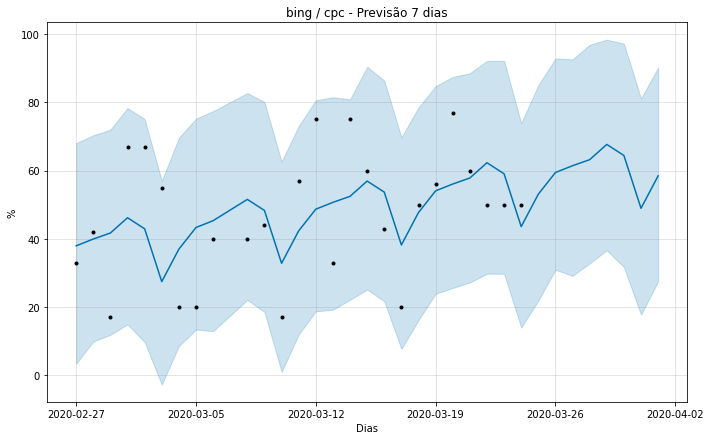

In [22]:
bing_cpc_series = bing_cpc[(bing_cpc['DataRetirada'] >= '2020-02-27') 
                                   & (bing_cpc['DataRetirada'] <= '2020-03-24')] 

#Previsão canal crieto/cpc
bing_cpc2 = bing_cpc_series.rename(columns={'DataRetirada': 'ds', 'NSH_CAN': 'y'})
bing_cpc2_model = Prophet(interval_width=0.95) #daily_seasonality = True
bing_cpc2_model.fit(bing_cpc2)

bing_cpc2_forecast = bing_cpc2_model.make_future_dataframe(periods=8, freq='d')
bing_cpc2_forecast = bing_cpc2_model.predict(bing_cpc2_forecast)

plt.figure(figsize=(25, 10))
bing_cpc2_model.plot(bing_cpc2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('bing / cpc - Previsão 7 dias');

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

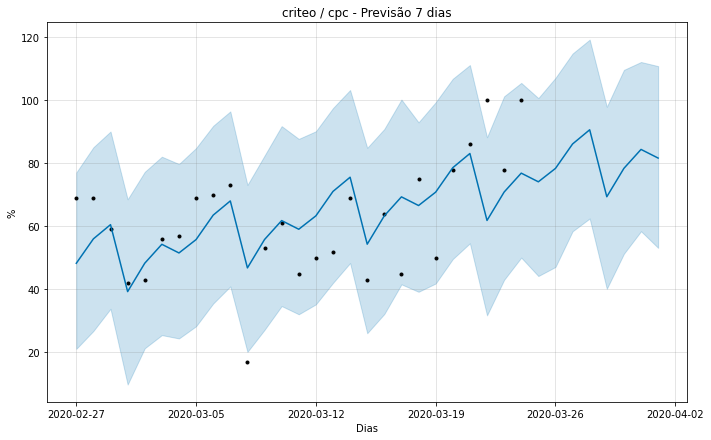

In [20]:
#Período dos filtros

criteo_cpc_series = criteo_cpc[(criteo_cpc['DataRetirada'] >= '2020-02-27') 
                                   & (criteo_cpc['DataRetirada'] <= '2020-03-24')] 

#Previsão canal crieto/cpc
criteo_cpc2 = criteo_cpc_series.rename(columns={'DataRetirada': 'ds', 'NSH_CAN': 'y'})
criteo_cpc2_model = Prophet(interval_width=0.95) #daily_seasonality = True
criteo_cpc2_model.fit(criteo_cpc2)

criteo_cpc2_forecast = criteo_cpc2_model.make_future_dataframe(periods=8, freq='d')
criteo_cpc2_forecast = criteo_cpc2_model.predict(criteo_cpc2_forecast)

plt.figure(figsize=(25, 10))
criteo_cpc2_model.plot(criteo_cpc2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('criteo / cpc - Previsão 7 dias');

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

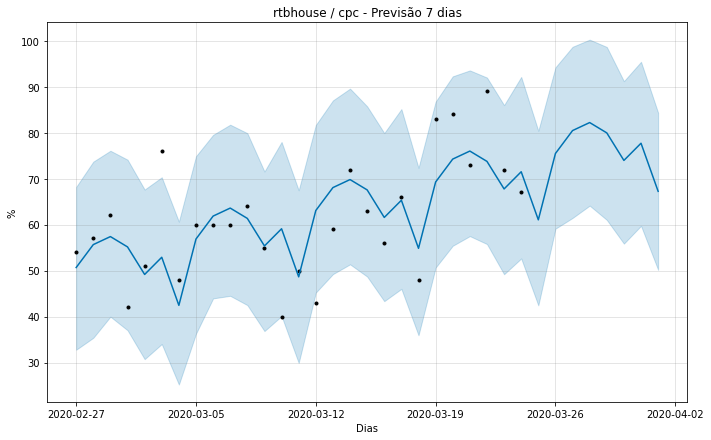

In [21]:
#Período dos filtros

rtb_house_cpc_series = rtb_house_cpc[(rtb_house_cpc['DataRetirada'] >= '2020-02-27') 
                                   & (rtb_house_cpc['DataRetirada'] <= '2020-03-24')] 

#Previsão canal crieto/cpc
rtb_house_cpc2 = rtb_house_cpc_series.rename(columns={'DataRetirada': 'ds', 'NSH_CAN': 'y'})
rtb_house_cpc2_model = Prophet(interval_width=0.95) #daily_seasonality = True
rtb_house_cpc2_model.fit(rtb_house_cpc2)

rtb_house_cpc2_forecast = rtb_house_cpc2_model.make_future_dataframe(periods=8, freq='d')
rtb_house_cpc2_forecast = rtb_house_cpc2_model.predict(rtb_house_cpc2_forecast)

plt.figure(figsize=(25, 10))
rtb_house_cpc2_model.plot(rtb_house_cpc2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('rtbhouse / cpc - Previsão 7 dias');

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

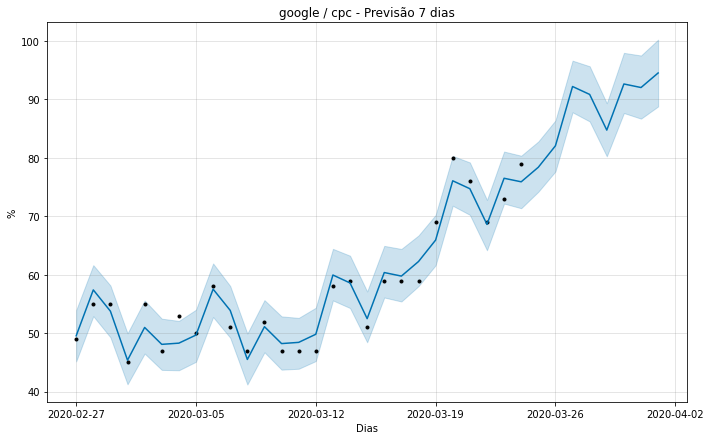

In [13]:
#Período dos filtros

google_cpc_series = google_cpc[(google_cpc['DataRetirada'] >= '2020-02-27') & (google_cpc['DataRetirada'] <= '2020-03-24')] 

#Previsão canal google cpc
google_cpc2 = google_cpc_series.rename(columns={'DataRetirada': 'ds', 'NSH_CAN': 'y'})
google_cpc2_model = Prophet(interval_width=0.95) #daily_seasonality = True
google_cpc2_model.fit(google_cpc2)

google_cpc2_forecast = google_cpc2_model.make_future_dataframe(periods=8, freq='d')
google_cpc2_forecast = google_cpc2_model.predict(google_cpc2_forecast)

plt.figure(figsize=(25, 10))
google_cpc2_model.plot(google_cpc2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('google / cpc - Previsão 7 dias');

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

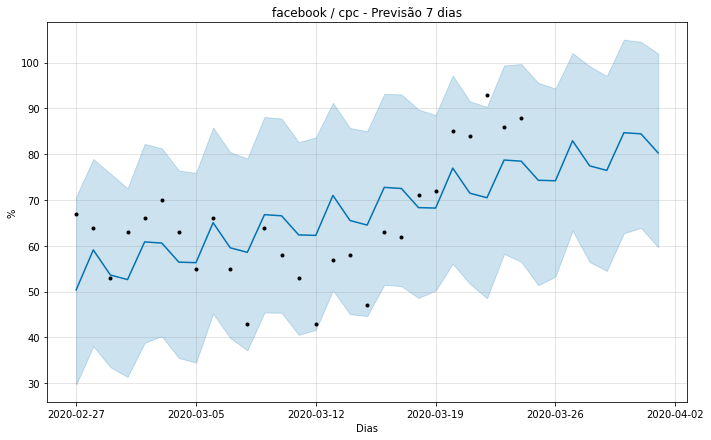

In [14]:
#Período dos filtros

facebook_cpc_series = facebook_cpc[(facebook_cpc['DataRetirada'] >= '2020-02-27') 
                                   & (facebook_cpc['DataRetirada'] <= '2020-03-24')] 

#Previsão canal facebook cpc
facebook_cpc2 = facebook_cpc_series.rename(columns={'DataRetirada': 'ds', 'NSH_CAN': 'y'})
facebook_cpc2_model = Prophet(interval_width=0.95) #daily_seasonality = True
facebook_cpc2_model.fit(facebook_cpc2)

facebook_cpc2_forecast = facebook_cpc2_model.make_future_dataframe(periods=8, freq='d')
facebook_cpc2_forecast = facebook_cpc2_model.predict(facebook_cpc2_forecast)

plt.figure(figsize=(25, 10))
facebook_cpc2_model.plot(facebook_cpc2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('facebook / cpc - Previsão 7 dias');

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

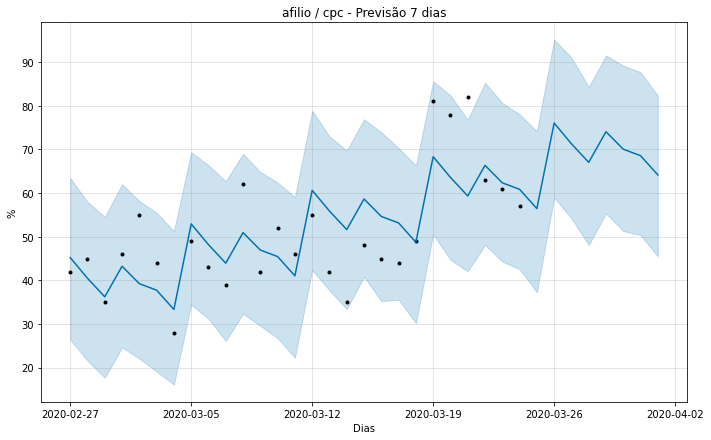

In [15]:
#Período dos filtros

afilio_cpc_series = afilio_cpc[(afilio_cpc['DataRetirada'] >= '2020-02-27') 
                                   & (afilio_cpc['DataRetirada'] <= '2020-03-24')] 

#Previsão canal afilio cpc
afilio_cpc2 = afilio_cpc_series.rename(columns={'DataRetirada': 'ds', 'NSH_CAN': 'y'})
afilio_cpc2_model = Prophet(interval_width=0.95) #daily_seasonality = True
afilio_cpc2_model.fit(afilio_cpc2)

afilio_cpc2_forecast = afilio_cpc2_model.make_future_dataframe(periods=8, freq='d')
afilio_cpc2_forecast = afilio_cpc2_model.predict(afilio_cpc2_forecast)

plt.figure(figsize=(25, 10))
afilio_cpc2_model.plot(afilio_cpc2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('afilio / cpc - Previsão 7 dias');

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

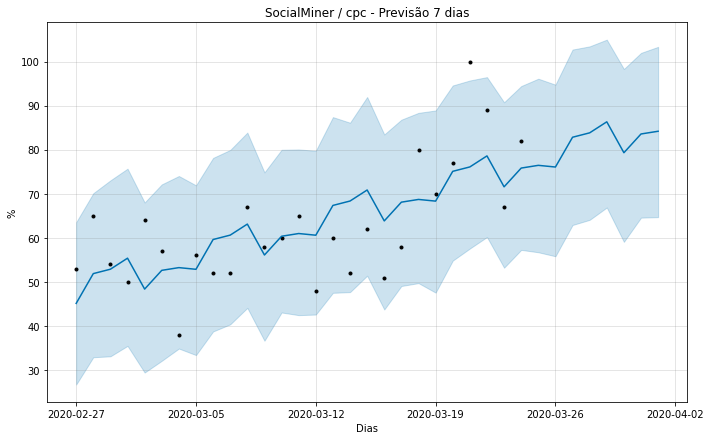

In [16]:
#Período dos filtros

socialMiner_series = socialMiner_cpc[(socialMiner_cpc['DataRetirada'] >= '2020-02-27') 
                                   & (socialMiner_cpc['DataRetirada'] <= '2020-03-24')] 

#Previsão canal afilio cpc
socialMiner_cpc2 = socialMiner_series.rename(columns={'DataRetirada': 'ds', 'NSH_CAN': 'y'})
socialMiner_cpc2_model = Prophet(interval_width=0.95) #daily_seasonality = True
socialMiner_cpc2_model.fit(socialMiner_cpc2)

socialMiner_cpc2_forecast = socialMiner_cpc2_model.make_future_dataframe(periods=8, freq='d')
socialMiner_cpc2_forecast = socialMiner_cpc2_model.predict(socialMiner_cpc2_forecast)

plt.figure(figsize=(25, 10))
socialMiner_cpc2_model.plot(socialMiner_cpc2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('SocialMiner / cpc - Previsão 7 dias');

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

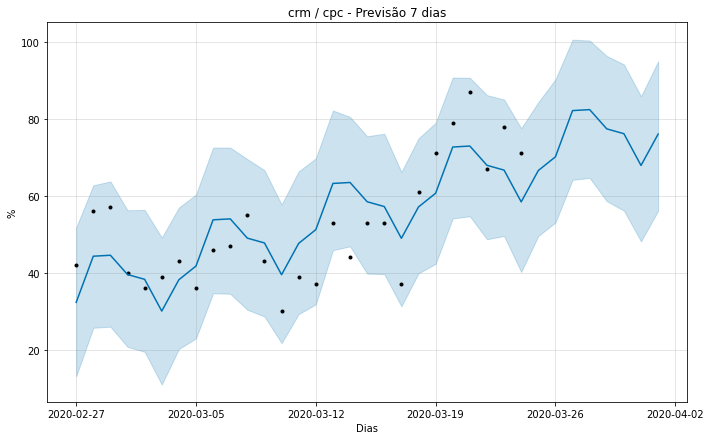

In [17]:
#Período dos filtros

crm_cpc_series = crm_cpc[(crm_cpc['DataRetirada'] >= '2020-02-27') 
                                   & (crm_cpc['DataRetirada'] <= '2020-03-24')] 

#Previsão canal crm/cpc
crm_cpc2 = crm_cpc_series.rename(columns={'DataRetirada': 'ds', 'NSH_CAN': 'y'})
crm_cpc2_model = Prophet(interval_width=0.95) #daily_seasonality = True
crm_cpc2_model.fit(crm_cpc2)

crm_cpc2_forecast = crm_cpc2_model.make_future_dataframe(periods=8, freq='d')
crm_cpc2_forecast = crm_cpc2_model.predict(facebook_cpc2_forecast)

plt.figure(figsize=(25, 10))
crm_cpc2_model.plot(crm_cpc2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('crm / cpc - Previsão 7 dias');

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

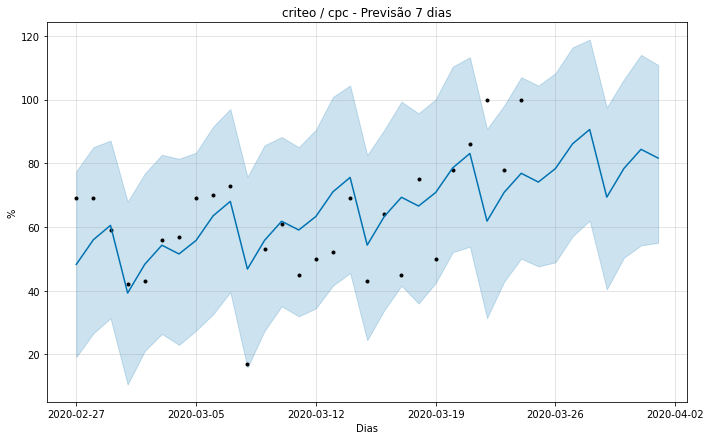

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

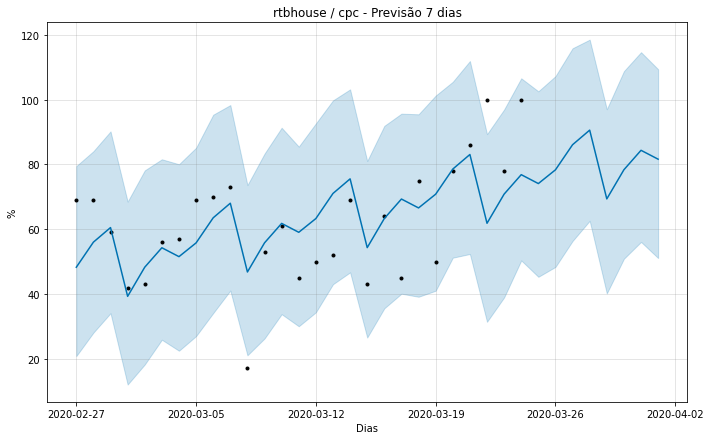

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

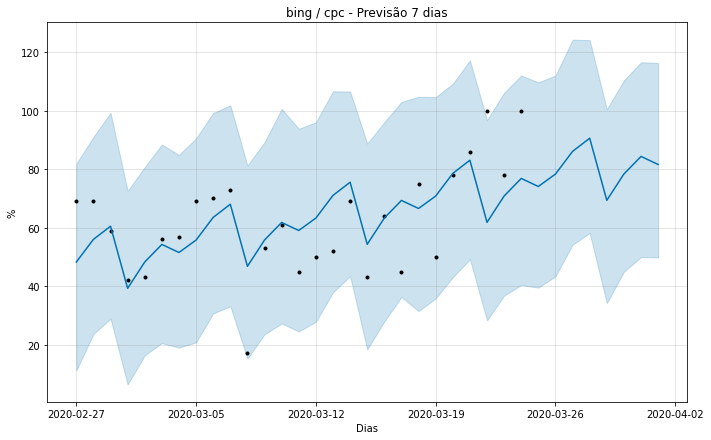

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


<Figure size 1800x720 with 0 Axes>

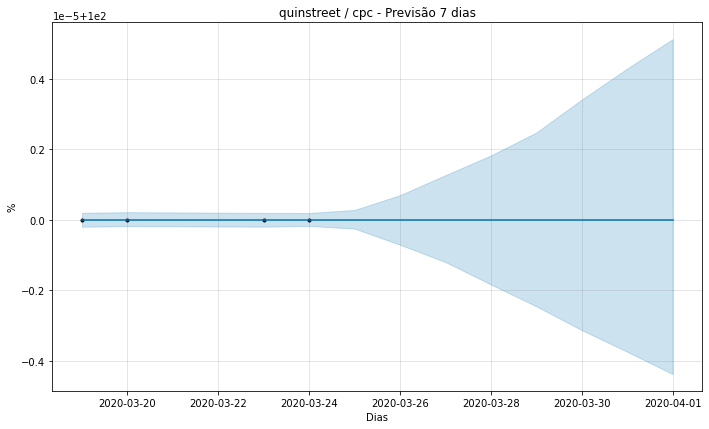

In [21]:
quinstreet_cpc_series = quinstreet_cpc[(quinstreet_cpc['DataRetirada'] >= '2020-02-27') & (quinstreet_cpc['DataRetirada'] <= '2020-03-24')] 

#Previsão canal google cpc
quinstreet_cpc2 = quinstreet_cpc_series.rename(columns={'DataRetirada': 'ds', 'NSH_CAN': 'y'})
quinstreet_cpc2_model = Prophet(interval_width=0.95) #daily_seasonality = True
quinstreet_cpc2_model.fit(quinstreet_cpc2)

quinstreet_cpc2_forecast = quinstreet_cpc2_model.make_future_dataframe(periods=8, freq='d')
quinstreet_cpc2_forecast = quinstreet_cpc2_model.predict(quinstreet_cpc2_forecast)

plt.figure(figsize=(25, 10))
quinstreet_cpc2_model.plot(quinstreet_cpc2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('quinstreet / cpc - Previsão 7 dias');

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


<Figure size 1800x720 with 0 Axes>

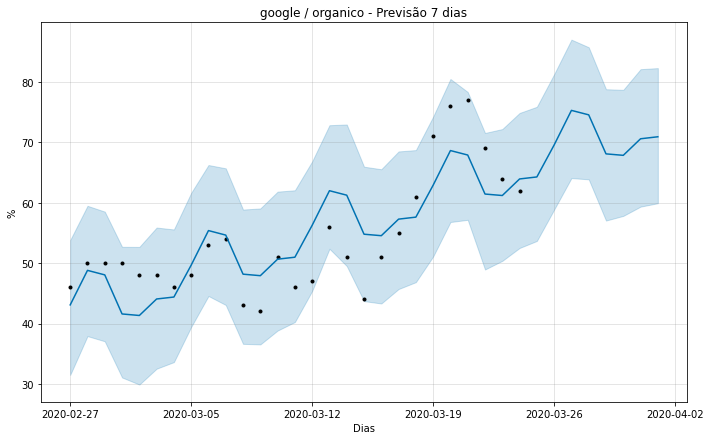

In [22]:
google_organico_series = google_organico[(google_organico['DataRetirada'] >= '2020-02-27') & (google_organico['DataRetirada'] <= '2020-03-24')] 

#Previsão canal google cpc
google_organico2 = google_organico_series.rename(columns={'DataRetirada': 'ds', 'NSH_CAN': 'y'})
google_organico2_model = Prophet(interval_width=0.95) #daily_seasonality = True
google_organico2_model.fit(google_organico2)

google_organico2_forecast = google_organico2_model.make_future_dataframe(periods=8, freq='d')
google_organico2_forecast = google_organico2_model.predict(google_organico2_forecast)

plt.figure(figsize=(25, 10))
google_organico2_model.plot(google_organico2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('google / organico - Previsão 7 dias');

In [23]:
google_cpc.to_excel('google_cpc.xlsx', index=False)
facebook_cpc.to_excel('facebook_cpc.xlsx', index=False)
afilio_cpc.to_excel('afilio_cpc.xlsx', index=False)
socialMiner_cpc.to_excel('socialMiner_cpc.xlsx', index=False)
crm_cpc.to_excel('crm_cpc.xlsx', index=False)
criteo_cpc.to_excel('criteo_cpc.xlsx', index=False)
rtb_house_cpc.to_excel('rtb_house_cpc.xlsx', index=False)
bing_cpc.to_excel('bing_cpc.xlsx', index=False)
google_organico.to_excel('google_organico.xlsx', index=False)

In [24]:
#ncan.to_excel('ncan.xlsx', index=False)

In [23]:
'''google_cpc2_forecast
facebook_cpc2_forecast
afilio_cpc2_forecast
socialMiner_cpc2_forecast
crm_cpc2_forecast
criteo_cpc2_forecast
rtb_house_cpc2_forecast
bing_cpc2_forecast
google_organico2_forecast'''

#google_cpc2_forecast.to_excel('google_cpc_forecast.xlsx', index=False)

#facebook_cpc2_forecast.to_excel('facebook_cpc_forecast.xlsx', index=False)

#afilio_cpc2_forecast.to_excel('afilio_cpc_forecast.xlsx', index=False)

#socialMiner_cpc2_forecast.to_excel('socialMiner_cpc_forecast.xlsx', index=False)

#crm_cpc2_forecast.to_excel('crm_cpc2_forecast.xlsx', index=False)

criteo_cpc2_forecast.to_excel('criteo_cpc2_forecast.xlsx', index=False)

rtb_house_cpc2_forecast.to_excel('rtb_houseforecast.xlsx', index=False)

bing_cpc2_forecast.to_excel('bing_cpc2forecast.xlsx', index=False)

#google_organico2_forecast.to_excel('google_organicoforecast.xlsx', index=False)